# Linear normal modes in the vibrations of a prismatic cantilever beam

An example of vibration analysis in SHARPy. A prismatic cantilever beam is first deformed under a static tip (follower) load. Linear normal modes are then computed for each load. Natural frequencies are finally plotted as a function of the deformation.

It uses the same properties as Example 8.1 in [Palacios & Cesnik's book](https://doi.org/10.1017/9781108354868), but it is not included in the book's first edition.

It runs with [SHARPy](www.imperial.ac.uk/aeroelastics/sharpy) v2.4

Latest update: 30.03.2025

## Required Packages

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sharpy.sharpy_main           # to run SHARPy from Jupyter
import cantilever.model as model    # model definition
from IPython.display import Image   # to import images.

plt.rcParams.update({'font.size': 20})   # Large fonts in all plots

In [2]:
# Define temporary files to generate sharpy models.
case_name= 'temp'
route = 'cantilever/'

# Define values of the tip forces up to P=Nforces*DeltaForce
Nforces=25        # Number of force steps (25)
DeltaForce=50e3   # Force increments.

# Discretization of the straight beam. It uses 3-noded elements of equal length
Nelem=40           # Number of beam elements (40)
N=2*Nelem+1        # Number of grid nodes

# Inialize the x-z nodal coordinates and frequencies for each force step 
x1=np.zeros((Nforces,N))
z1=np.zeros((Nforces,N))
freqs=np.zeros((Nforces,10))

# Loop through all external forces
for jForce in range(Nforces):
    # Call the functions that generate the model and define the simulation options. 
    model.clean_test_files(route, case_name)
    model.generate_fem_file(route, case_name, Nelem, deadforce=0,
                            followerforce=float(jForce)*DeltaForce, massless=False)
    model.generate_solver_file(route, case_name, ['BeamLoader', 'NonLinearStatic', 'Modal'], gravity=0.)

    case_data=sharpy.sharpy_main.main(['', route + case_name + '.sharpy'])

    # Run SHARPy and store the x-z coordinates (in m) and frequencies (in Hz) 
    # for the current load
    x1[jForce,0:N]=case_data.structure.timestep_info[0].pos[:, 0]
    z1[jForce,0:N]=case_data.structure.timestep_info[0].pos[:, 2]

    freqs[jForce,0:10]=case_data.structure.timestep_info[0].modal['freq_natural']/2/np.pi  # Freqs in Hz.

# Store initial geometry
x0=case_data.structure.ini_info.pos[:, 0]
z0=case_data.structure.ini_info.pos[:, 2]

fatal: not a git repository (or any of the parent directories): .git
/tmp/ipykernel_12082/3515907736.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
  freqs[jForce,0:10]=case_data.structure.timestep_info[0].modal['freq_natural']/2/np.pi  # Freqs in Hz.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git reposi

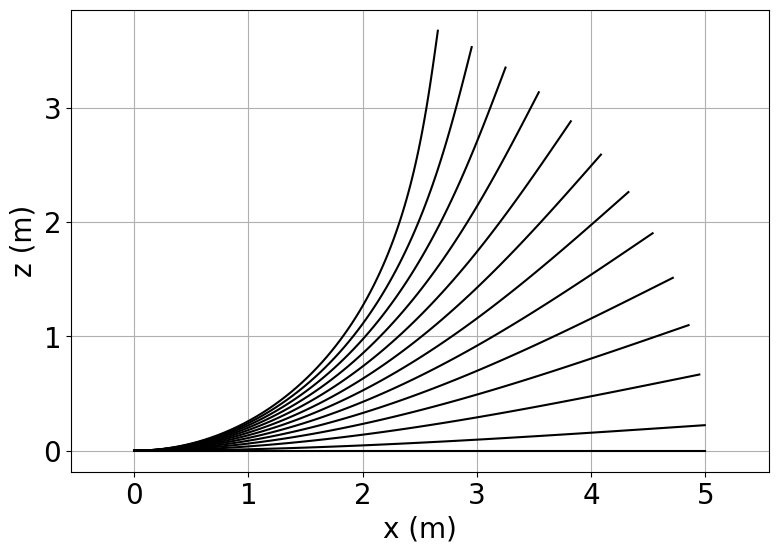

In [3]:
# Plot the deformed beam shapes
fig= plt.subplots(1, 1, figsize=(9, 6))
plt.plot(x0,z0,c='black')

for jForce in range(1,Nforces,2):
    #plt.scatter(x1[jForce,0:N],z1[jForce,0:N],c='black')
    plt.plot(x1[jForce,0:N],z1[jForce,0:N],c='black')

plt.axis('equal')
plt.grid()
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.savefig("images/ncb1-foll-nograv.eps",  format='eps', dpi=1000, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


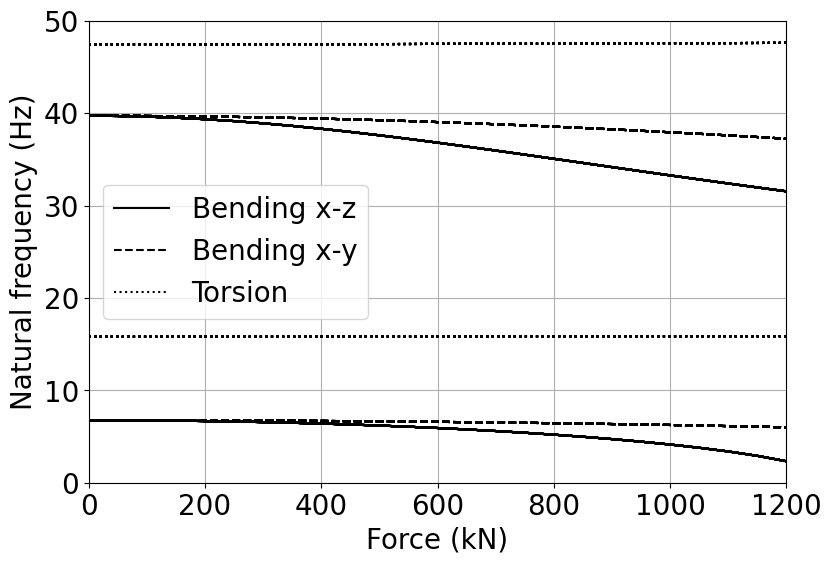

In [4]:
## Plot natural frequencies
fig= plt.subplots(1, 1, figsize=(9, 6))

Style=['-','--',':','-','--',':']
for jForce in range(Nforces):
    for jMode in range(6):
        #plt.scatter(np.arange(0,Nforces*DeltaForce/1e3,DeltaForce/1e3), freqs[0:Nforces,jMode],linestyle='-', c='black')
        plt.plot   (np.arange(0,Nforces*DeltaForce/1e3,DeltaForce/1e3), freqs[0:Nforces,jMode],Style[jMode], c='black')
plt.xlabel('Force (kN)')
plt.ylabel('Natural frequency (Hz)')
plt.axis([0,1200,0,50])
plt.legend(['Bending x-z','Bending x-y','Torsion'])
plt.grid()
plt.savefig("images/ncb1-foll-freqs.eps",  format='eps', dpi=1000, bbox_inches='tight')

In [5]:
model.clean_test_files(route, case_name)